<a href="https://colab.research.google.com/github/huangtinglin/test_colab/blob/main/colab0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction of PyTorch

PyTorch is a free and open source framework used for machine leanring research and application. It specializes in tensor computations, automatic differentiation, and GPU acceleration. PyTorch is one of the most popular deep learning libraries. See more introduction in https://pytorch.org/. 


## Outline



- Basic operation
- Models
- Datasets
- Training and testing

## Basic operation

In [3]:
# import the pytorch library into environment and check its version
import torch
print("Using torch", torch.__version__)

Using torch 1.12.1+cu113


### Create Tensor

Tensor are the central data abstraction in PyTorch. You can generalize it to the concept you already know. For example, a vector is a 1-D tensor, and a matrix is a 2-D tensor. We can easily create a tensor of various shapes and number of dimensions by PyTorch. 

In [2]:
# construct a 1-D tensor from a list
x = torch.tensor([1, 2, 3])
print(x)

# construct a 2-D tensor from a list
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x)

tensor([1, 2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


Given a tensor, we can obtain its shape by using `.size` or `.shape` method:

In [5]:
print("Shape of x is", x.shape)

print("Size of x is", x.size())

Shape of x is torch.Size([2, 3])
Size of x is torch.Size([2, 3])


Here are alternatives to create a tensor:

* `torch.zeros`: Creates a tensor filled with zeros
* `torch.ones`: Creates a tensor filled with ones
* `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
* `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
* `torch.arange`: Creates a 1-D tensor containing the values $N,N+1,N+2,...,M$



In [6]:
# construct a tensor with random numbers with shape (4, 5)
x = torch.rand(4, 5)
print("Tensor created by torch.rand function", x)

# construct a tensor filled with the scalar value 0 with shape (2, 3, 4)
x = torch.zeros(2, 3, 4)
print("Tensor created by torch.arange function", x)

Tensor created by torch.rand function tensor([[0.3935, 0.7803, 0.6577, 0.4761, 0.8568],
        [0.8260, 0.3525, 0.1303, 0.8619, 0.2387],
        [0.8366, 0.5102, 0.2682, 0.5557, 0.6482],
        [0.4305, 0.6445, 0.5481, 0.9904, 0.2550]])
Tensor created by torch.arange function tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


### Tensor Operations

PyTorch supports various tensor operations. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#). For example, we can add two tensors with same shape:

In [7]:
x1 = torch.rand(2, 2)
x2 = torch.rand(2, 2)
x3 = x1 + x2  # return the sum of x1 and x2

print("x1:", x1)
print("x2:", x2)
print("x3:", x3)

x1: tensor([[0.3767, 0.4290],
        [0.5589, 0.5981]])
x2: tensor([[0.7592, 0.4259],
        [0.6429, 0.6586]])
x3: tensor([[1.1359, 0.8550],
        [1.2018, 1.2567]])


We also can calculate the matrix product between two tensors:

In [8]:
x = torch.rand(3)
W = torch.rand(2, 3)
h = torch.matmul(W, x)  # return the product between W and x

print("shape of x:", x.shape, "x:", x)  # shape: [3]
print("shape of W:", W.shape, "W:", W)  # shape: [2, 3]
print("shape of h:", h.shape, "h:", h)  # shape: [2]

shape of x: torch.Size([3]) x: tensor([0.5885, 0.3130, 0.7019])
shape of W: torch.Size([2, 3]) W: tensor([[0.2570, 0.5820, 0.0585],
        [0.1099, 0.7409, 0.5183]])
shape of h: torch.Size([2]) h: tensor([0.3745, 0.6603])


Another common operation aims at changing the shape of a tensor. A tensor'size can be re-organized to any other shape with the same number of elements. In PyTorch, this operation is called `view` or `reshape`:

In [9]:
x = torch.rand(2, 3)
x1 = x.view(6)
x2 = x.reshape(3, 2)

print("shape of x:", x.shape, "x:", x)  # shape: [2, 3]
print("shape of x1:", x1.shape, "x1:", x1)  # shape: [6]
print("shape of x2:", x2.shape, "x2:", x2)  # shape: [3, 2]

shape of x: torch.Size([2, 3]) x: tensor([[0.6696, 0.0279, 0.9617],
        [0.8369, 0.2993, 0.3337]])
shape of x1: torch.Size([6]) x1: tensor([0.6696, 0.0279, 0.9617, 0.8369, 0.2993, 0.3337])
shape of x2: torch.Size([3, 2]) x2: tensor([[0.6696, 0.0279],
        [0.9617, 0.8369],
        [0.2993, 0.3337]])


## Models

We can use PyTorch to build deep learning model. Here we will give an example of using multi-layer perceptron (MLP) to perform image classification. We'll start with building a MLP.


In [5]:
# import neural network module of PyTorch
import torch.nn as nn
import torch.nn.functional as F

A MLP is built by stacking multiple linear layers:

$$Linear(X):=A X + b$$ 

with $X\in \mathbb{R}^{n\times k}$, $A\in \mathbb{R}^{m\times n}$, $b\in\mathbb{R}^{m\times 1}$. We can implement a linear layer with `nn.Linear`:



In [11]:
linear = nn.Linear(5, 10)  # creat a linear layer with n=5, m=10

print(linear.weight.shape)  # [10, 5]
print(linear.bias.shape)  # [10]

torch.Size([10, 5])
torch.Size([10])


Besides, to expand the capability and allow model to learn non-linear transformation between inputs and outputs, we will introduce the non-linear activation function between two linear layers. Here we use ReLU activation function:

![](https://github.com/bentrevett/pytorch-image-classification/blob/master/assets/relu.png?raw=1)

We can implement a ReLU functino by using `F.relu` or `nn.ReLU()`:

In [6]:
x = torch.rand(2, 3)
act_fn = nn.ReLU()

print("x:", x)
print("F.relu(x):", F.relu(x))
print("nn.relu(x):", act_fn(x))

x: tensor([[0.1832, 0.8211, 0.6775],
        [0.3642, 0.8392, 0.4432]])
F.relu(x): tensor([[0.1832, 0.8211, 0.6775],
        [0.3642, 0.8392, 0.4432]])
nn.relu(x): tensor([[0.1832, 0.8211, 0.6775],
        [0.3642, 0.8392, 0.4432]])


Now we can try to build a MLP with linear layer and non-linear function. We use `nn.Module` to define a MLP class containing the basic modules of MLP:

In [7]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()

        self.input_fc = nn.Linear(input_dim, hidden_dim)
        self.output_fc = nn.Linear(hidden_dim, output_dim)
        self.act_fn = nn.ReLU()

    def forward(self, x):

        batch_size = x.shape[0]

        x = x.view(batch_size, -1)
        h_1 = self.input_fc(x)
        h_1 = self.act_fn(h_1)
        y_pred = self.output_fc(h_1)

        return y_pred

As shown in the `MLP` class, we initialize the modules we need in `__init__` function, and perform the calculation of the model to predict the results in `forward` function. Here is an example to instantiate a MLP model:

In [10]:
model = MLP(input_dim=10, hidden_dim=20, output_dim=10)
print(model)  # show all the submodules

MLP(
  (input_fc): Linear(in_features=10, out_features=20, bias=True)
  (output_fc): Linear(in_features=20, out_features=10, bias=True)
  (act_fn): ReLU()
)


We can obtain the parameters of a module by its `parameters` functions, or `named_parameters` to get a name to each parameter object. For our MLP, we have the following parameters:

In [11]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter input_fc.weight, shape torch.Size([20, 10])
Parameter input_fc.bias, shape torch.Size([20])
Parameter output_fc.weight, shape torch.Size([10, 20])
Parameter output_fc.bias, shape torch.Size([10])


## Datasets

We are going to use a dataset for image classification called MNIST. It is a large database of handwritten digits, and widely used for training and testing in the field of image processing. We can esily load this dataset with the help of PyTorch.


In [22]:
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms

After importing required library, we can download the dataset of MNIST and save it in a folder. It will automatically create the folder if it doesn't exist.

In [13]:
ROOT = '.data'  # the folder for saving dataset

train_data = datasets.MNIST(root=ROOT,
                            train=True,
                            download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting .data/MNIST/raw/train-images-idx3-ubyte.gz to .data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting .data/MNIST/raw/train-labels-idx1-ubyte.gz to .data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting .data/MNIST/raw/t10k-images-idx3-ubyte.gz to .data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting .data/MNIST/raw/t10k-labels-idx1-ubyte.gz to .data/MNIST/raw



To improve the model's generalization and robustness, we usually will preprocess and augment our dataset. Data augmentation is a group of methods for creating new data points from existing data in order to increase the amount of data. These operations are included in `transforms.Compose` function. Here are some common transforms:

- `RandomRotation` - randomly rotates the image between `(-x, +x)` degrees, where we have set `x = 5`. 
- `RandomCrop` - randomly taking a square crop of the image.
- `ToTensor()` - this converts the image from a PIL format into a PyTorch tensor.
- `Normalize` - this subtracts the mean and divides by the standard deviations given. 


In [15]:
mean = train_data.data.float().mean() / 255
std = train_data.data.float().std() / 255

train_transforms = transforms.Compose([
                            transforms.RandomRotation(5, fill=(0,)),
                            transforms.RandomCrop(28, padding=2),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[mean], std=[std])
                                      ])

test_transforms = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean=[mean], std=[std])
                                     ])

Now with the transform function, we can load the train and test dataset of MNIST:

In [17]:
train_data = datasets.MNIST(root=ROOT,
                            train=True,
                            download=True,
                            transform=train_transforms)

test_data = datasets.MNIST(root=ROOT,
                           train=False,
                           download=True,
                           transform=test_transforms)

print(f'Number of training examples: {len(train_data)}')  # check the number of the image in the train datasets
print(f'Number of testing examples: {len(test_data)}')  # check the number of the image in the test datasets

Number of training examples: 60000
Number of testing examples: 10000


We can have a look at these images with the help of library `matplotlib`. 

(-0.5, 27.5, 27.5, -0.5)

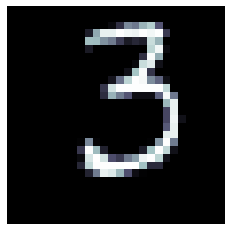

In [20]:
import matplotlib.pyplot as plt

image_idx = 50  # the index of the image we want to see
image, label = train_data[50]  # the image data and its corresponding label

fig = plt.figure()
plt.imshow(image.view(28, 28).cpu().numpy(), cmap='bone')  # plot the image
plt.axis('off')

`DataLoader` is also an important tool during our training. It can iterate over the dataset and yield a batch of images and labels to the model. The batchsize is a hyperparameter and we need to tune it during training. Here we set batchsize as 64, and define the dataloader for training and testing:

In [23]:
BATCH_SIZE = 64

train_iterator = data.DataLoader(train_data,
                                 shuffle=True,  # shuffle the dataset in every epoch
                                 batch_size=BATCH_SIZE)

test_iterator = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE)

## Training and testing

Here is a total pipeline of training a model:

- pass a batch of data through the model and obtain the prediction
- compare the prediction with the label and calculate the loss of this batch
- calculate the gradient of each of the parameters with respect to the loss
- update the parameters with optimizer

To end-to-end train a model, we need to define a [optimizer](https://ruder.io/optimizing-gradient-descent/) and [loss function](https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23). Optimizer is a kind of algorithm used to updated the parameter effectively. Here we use Adam as our optimizer:

In [24]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())